In [1]:
import numpy as np
from message import Message
from message import MessageClass
from filereader import FileReader
from fscore import fscore

from os import listdir


def extract_set_from_dir(dir):
    data_set = []
    for filename in listdir(dir):
        reader = FileReader(dir + filename)
        data_set.append(reader.read())
    return data_set


In [2]:
msg_numbers = range(1, 11)
msg_dirs = list(map(lambda x: "../messages/part" + str(x) + "/", msg_numbers))

In [3]:
data_set = []
for dir in msg_dirs:
    data_set.extend(extract_set_from_dir(dir))

In [52]:
from model import Model
import matplotlib.pyplot as plt
import math

times = 15

def run(train_set, test_set, a, llegit=1):
    mtx = np.zeros(4).reshape([2, 2])
    model = Model(train_set, a, llegit=llegit)
    for m in test_set:
        actual = model.predict(m)
        mtx[m.clazz.value - 1][actual.value - 1] += 1
#         print(m.clazz, actual)
    return fscore(mtx)
    
def separate():
    ds_copy = data_set.copy()
    np.random.shuffle(ds_copy)
    return ds_copy[:150], ds_copy[150:]


def init_models_for_loo(a):
    models = {}
    for test_m in data_set:
        train_set = data_set.copy()
        train_set.remove(test_m)
        model = Model(train_set, a)
        models[test_m] = model    
    print("models initialized")
    return models

def loo_for_llegits(models, llegits):
    result = []
    i = 0
    for llegit in llegits:   
        mtx = np.zeros(4).reshape([2, 2])
        for test_m in data_set:
            model = models[test_m]
            actual = model.predict(test_m, llegit=llegit)
            mtx[test_m.clazz.value - 1][actual.value - 1] += 1
        result.append(fscore(mtx))
        if mtx[1][0] == 0:
            print("Success!")
            print("llegit: 10 ^", i)
            print(mtx)
            break
        print("llegit: 10 ^", i)
        i += 1
        print("DAMN!, Still some legit classified as spam")
        print(mtx)
        print()
    return result

def draw(logs, scores):
    plt.plot(logs, scores)
    plt.xlabel('logs')
    plt.ylabel('scores')
    plt.legend()
    plt.show()
        

In [60]:
alphas = [1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
          1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 2e-2, 5e-2, 1e-1, 2e-1, 3e-1, 5e-1, 6e-1, 7e-1]

fscores = {}

for a in alphas:
    scores = []
    for t in range(times):
        test_set, train_set = separate()
        score, mtx = run(train_set, test_set, a)
        scores.append(score)
    print("a:", a)
    fscores[a] = sum(scores) / times
    print("fscore:", fscores[a])
    print(mtx)
    print()

optimalk = alphas[0]
for a in alphas:
    if fscores[a] > fscores[optimalk]:
        optimalk = a
print("BEST:", optimalk, fscores[optimalk])

a: 1e-05
fscore: 0.9759600710710391
[[63.  1.]
 [ 2. 84.]]

a: 2e-05
fscore: 0.9773023894293555
[[69.  4.]
 [ 2. 75.]]

a: 3e-05
fscore: 0.982667066206399
[[71.  3.]
 [ 1. 75.]]

a: 4e-05
fscore: 0.9719904963373427
[[64.  1.]
 [ 1. 84.]]

a: 5e-05
fscore: 0.9773413222928976
[[67.  3.]
 [ 4. 76.]]

a: 6e-05
fscore: 0.9786802977019555
[[57.  3.]
 [ 1. 89.]]

a: 7e-05
fscore: 0.9786476207087993
[[64.  0.]
 [ 3. 83.]]

a: 8e-05
fscore: 0.9733516507902003
[[71.  2.]
 [ 4. 73.]]

a: 9e-05
fscore: 0.9773166211875134
[[68.  0.]
 [ 2. 80.]]

a: 0.0001
fscore: 0.9866646178590102
[[73.  1.]
 [ 1. 75.]]

a: 0.0005
fscore: 0.9732891865752415
[[76.  2.]
 [ 2. 70.]]

a: 0.001
fscore: 0.9759705894848043
[[54.  1.]
 [ 2. 93.]]

a: 0.005
fscore: 0.9692472613813902
[[60.  2.]
 [ 4. 84.]]

a: 0.01
fscore: 0.9719373744967676
[[71.  0.]
 [ 4. 75.]]

a: 0.02
fscore: 0.9812613567283565
[[60.  0.]
 [ 3. 87.]]

a: 0.05
fscore: 0.9638646943102858
[[58.  0.]
 [ 5. 87.]]

a: 0.1
fscore: 0.9733439154982502
[[77.  1

In [15]:
models = init_models_for_loo(1e-2)

models initialized


In [53]:
powlist = range(0, 1000)

llegits = list(map(lambda x: 10 ** x, powlist))

In [55]:
result = loo_for_llegits(models, llegits)

llegit: 10 ^ 0
DAMN!, Still some legit classified as spam
[[475.   5.]
 [ 22. 588.]]

llegit: 10 ^ 1
DAMN!, Still some legit classified as spam
[[475.   5.]
 [ 21. 589.]]

llegit: 10 ^ 2
DAMN!, Still some legit classified as spam
[[475.   5.]
 [ 19. 591.]]

llegit: 10 ^ 3
DAMN!, Still some legit classified as spam
[[473.   7.]
 [ 16. 594.]]

llegit: 10 ^ 4
DAMN!, Still some legit classified as spam
[[471.   9.]
 [ 16. 594.]]

llegit: 10 ^ 5
DAMN!, Still some legit classified as spam
[[467.  13.]
 [ 14. 596.]]

llegit: 10 ^ 6
DAMN!, Still some legit classified as spam
[[466.  14.]
 [ 14. 596.]]

llegit: 10 ^ 7
DAMN!, Still some legit classified as spam
[[458.  22.]
 [ 13. 597.]]

llegit: 10 ^ 8
DAMN!, Still some legit classified as spam
[[452.  28.]
 [ 10. 600.]]

llegit: 10 ^ 9
DAMN!, Still some legit classified as spam
[[448.  32.]
 [  9. 601.]]

llegit: 10 ^ 10
DAMN!, Still some legit classified as spam
[[445.  35.]
 [  9. 601.]]

llegit: 10 ^ 11
DAMN!, Still some legit classified as

No handles with labels found to put in legend.


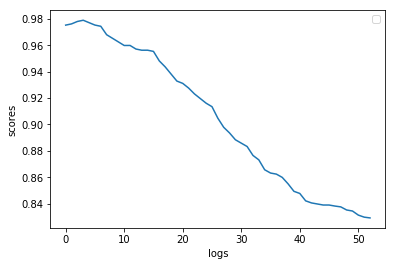

In [56]:
length = len(result)
scores = []
for x in result:
    score, mtx = x
    scores.append(score)
draw(powlist[:length], scores)